<h1><center>Kats 203 Time Series Features</center></h1> 

Kats, a tool*K*it to *a*nalyze *t*ime *s*eries data, a light-weight, easy-to-use, and generalizable framework to perform Time Series analysis, including feature extraction, detection, forecasting modeling, and more.

In this tutorial, we will introduce how to apply TsFeatures component for extracting meaningful features from time series

In [12]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kats.consts import TimeSeriesData
from kats.utils.simulator import Simulator
from kats.tsfeatures.tsfeatures import TsFeatures

## 1. Getting Data
To demonstrate using TsFeatures for time series feature engineering, we will start with simulating time series data using simulator function in Kats.

In [13]:
sim = Simulator(n=30, freq="D", start = pd.to_datetime("2021-01-01 00:00:00"))
np.random.seed(100) # setting numpy seed
ts = sim.arima_sim(ar=[0.1, 0.05], ma = [0.04, 0.1], d = 1) # generating time series data with arima_sim
ts.to_dataframe().head() # let's take a glimpse on the simulated data

,time,value
0,2021-01-01,0.797342
1,2021-01-02,1.494317
2,2021-01-03,1.608064
3,2021-01-04,1.186103
4,2021-01-05,2.147635


Let's visualize this time series data.

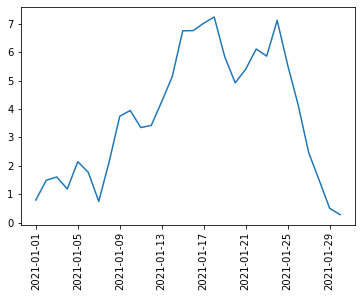

In [15]:
ts_dataframe = ts.to_dataframe() # transforming the TimeSeriesData object to pd.DataFrame
plt.plot(
    pd.to_datetime(ts_dataframe.time.values),
    ts_dataframe.value.values
)
plt.xticks(rotation = 90);

Currently, TsFeatures can only process one time series a time, you can loop through all your time series data in a list to acquire the engineered features. Let's simulate a list of time series data to demonstrate the process.

In [16]:
ts_list = [sim.arima_sim(ar=[0.1, 0.05], ma = [0.04, 0.1], d = 1) for _ in range(10)]

# let's take a look at one of the time series simulated in the list
ts_list[0].to_dataframe().head()

## 2. Basic Usage
In this section, let's talk about how to perform feature engineering on time series data using TsFeatures.

In [25]:
# Step 1. initiate TsFeatures
model = TsFeatures()

# Step 2. use .transform() method, and apply on the target time series data
output_features = model.transform(ts)
output_features

../kats/tsfeatures/tsfeatures.py:390: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

../kats/tsfeatures/tsfeatures.py:401: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'length': 30,
 'mean': 3.772849953069392,
 'var': 4.954091417559208,
 'entropy': -0.2632188176389366,
 'lumpiness': 1.6442530267813829,
 'stability': 0.8810971489778558,
 'flat_spots': 1,
 'hurst': -0.13117324646122858,
 'std1st_der': 0.7711390178084548,
 'crossing_points': 4,
 'binarize_mean': 0.5,
 'unitroot_kpss': 0.3140644791352164,
 'heterogeneity': 18.09977373721329,
 'histogram_mode': 6.537638461139399,
 'linearity': 0.09729334198648552,
 'trend_strength': 0.9524889542164686,
 'seasonality_strength': 0.7616516077485711,
 'spikiness': 6.91743537912088e-05,
 'peak': 1,
 'trough': 6,
 'level_shift_idx': 3,
 'level_shift_size': 0.2964711197227068,
 'y_acf1': 0.8409267102125535,
 'y_acf5': 1.4551644240480952,
 'diff1y_acf1': 0.32789881020767114,
 'diff1y_acf5': 0.12799997486319578,
 'diff2y_acf1': -0.28049764596457977,
 'diff2y_acf5': 0.1977867346991956,
 'y_pacf5': 0.8991946989807269,
 'diff1y_pacf5': 0.15254353388966113,
 'diff2y_pacf5': 0.5212609139311881,
 'seas_acf1': 0.0544595

We currently calculate 40 features by default, and we also support 28 additional features. Users can choose which features to opt-in or opt-out in the calculation using *selected_features* argument, which will be demonstrated in section 4.

Let's now loop through the time series data list, and create a dataframe of features.

In [21]:
model = TsFeatures()
output_features = [model.transform(ts) for ts in ts_list] # loop through time series data and perform transformation

../kats/tsfeatures/tsfeatures.py:390: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

../kats/tsfeatures/tsfeatures.py:401: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning:

Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning:

The test statistic is outsi

In [24]:
df_features = pd.DataFrame(output_features) # converting to dataframe
df_features.head()

,length,mean,var,entropy,lumpiness,stability,flat_spots,hurst,std1st_der,crossing_points,...,diff2y_pacf5,seas_acf1,seas_pacf1,firstmin_ac,firstzero_ac,holt_alpha,holt_beta,hw_alpha,hw_beta,hw_gamma
0,30,-3.829331,4.410670,-0.431779,1.481483,2.703985,1,-0.238747,0.681205,6,...,0.604346,0.233461,-0.180080,15,11,0.880766,NaN,NaN,NaN,NaN
1,30,-14.967749,25.832117,-0.621863,16.510030,17.307908,1,0.151705,0.841313,1,...,0.873384,0.285477,0.075487,21,12,0.996612,NaN,NaN,NaN,NaN
2,30,4.515387,3.845002,-0.370711,1.670459,1.256356,1,0.079531,0.636654,4,...,1.384431,0.093197,-0.470592,16,9,0.359531,NaN,0.38329,NaN,NaN
3,30,7.285806,20.379969,-0.398083,46.262931,12.838333,1,-0.251938,0.665138,1,...,0.596527,0.231362,-0.283585,20,10,0.998170,NaN,NaN,NaN,NaN
4,30,-1.973667,6.693837,-0.274211,2.901694,1.512221,1,0.013153,0.761175,4,...,0.658800,0.093167,0.121982,14,9,0.736163,NaN,NaN,NaN,NaN


## 3. Applications
In this section, we'll use three examples to demonstrate some applications of TsFeatures in identifying internal attributes of time series data. We will use the *df_features* dataframe output from the section 2 in these applications.